## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo_encoders.misc import viewer
from tomo_encoders import DataFile
from scipy.ndimage import gaussian_filter
from skimage.filters import threshold_otsu

In [2]:
pixel_res = 1.17 # micrometer per pixel
b = 4
def transform_ax2(img):
    img = np.fliplr(img)
    img = np.rot90(img)
    return img

In [3]:
Vx = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/test_x_bin', tiff = True).read_full()


##################################################
Found existing tiff folder: test_x_bin
Dataset shape: (224, 544, 544)


In [4]:
# Vx = gaussian_filter(Vx, 0.5)
thresh = threshold_otsu(Vx.reshape(-1))
Vp = (Vx > thresh).astype(np.uint8)

In [5]:
imx = viewer.get_orthoplanes(vol = Vx)
imp = viewer.get_orthoplanes(vol = Vp)

(-0.5, 543.5, 543.5, -0.5)

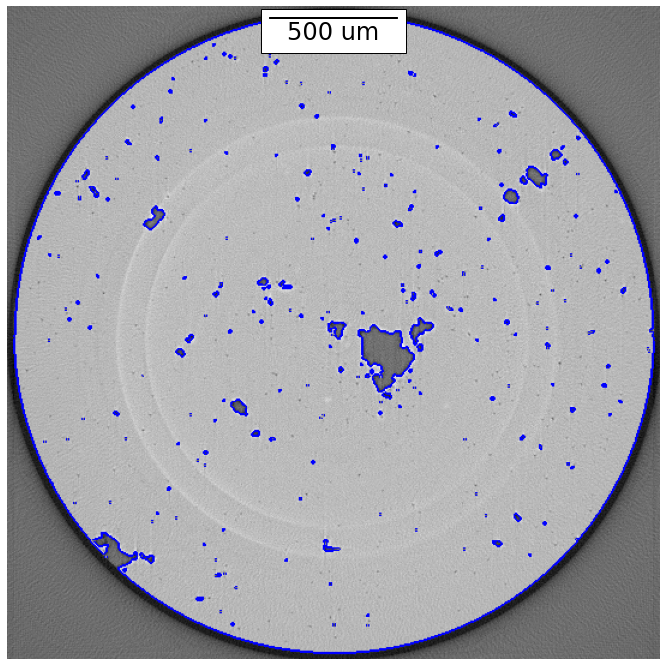

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[0], imp[0], ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17*b, loc = 'upper center', fontsize = 24)
ax.axis('off')

<AxesSubplot:>

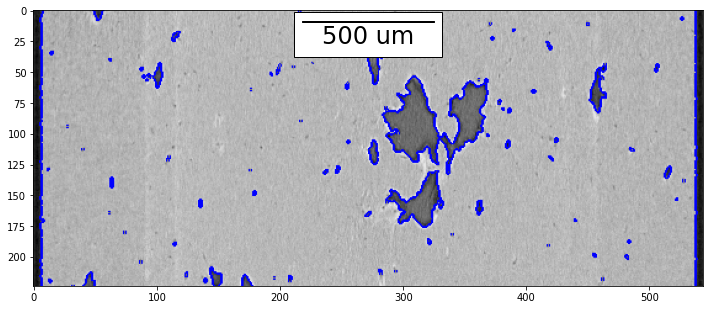

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[1], imp[1], ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17*4, loc = 'upper center', fontsize = 24)
# ax.axis('off')

(-0.5, 223.5, 543.5, -0.5)

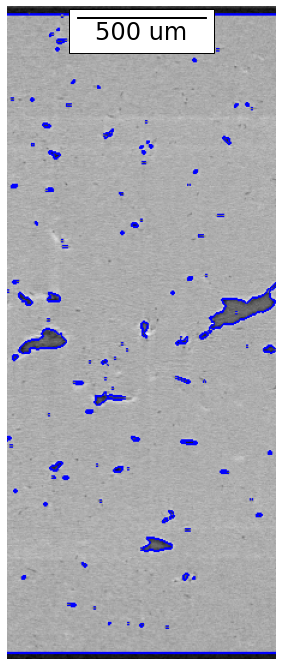

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(transform_ax2(imx[2]), transform_ax2(imp[2]), ax, color =[0,0,255])
viewer.add_scalebar(ax, 500, 1.17*4, loc = 'upper center', fontsize = 24)
ax.axis('off')

## TROUBLESHOOTING

<AxesSubplot:>

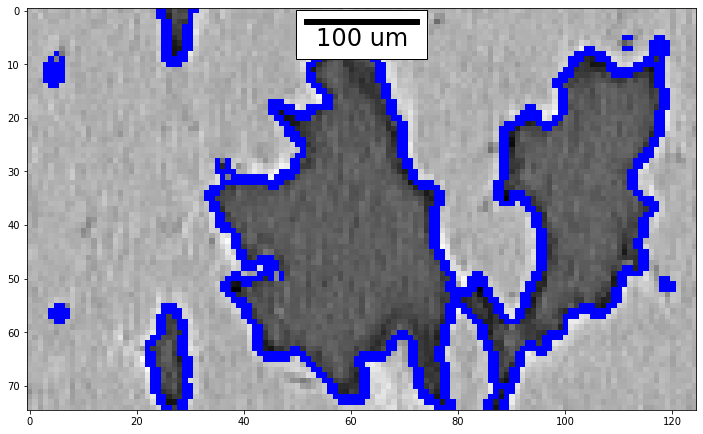

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[1][200//b:500//b,1000//b:1500//b], imp[1][200//b:500//b,1000//b:1500//b], ax, color =[0,0,255])
viewer.add_scalebar(ax, 100, 1.17*4, loc = 'upper center', fontsize = 24)
# ax.axis('off')

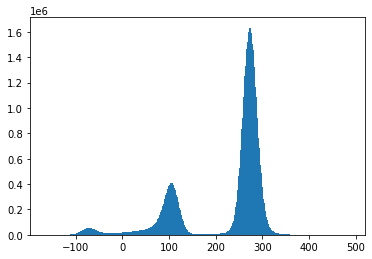

In [10]:
h = plt.hist(Vx.reshape(-1), bins = 500)

(-0.5, 124.5, 124.5, -0.5)

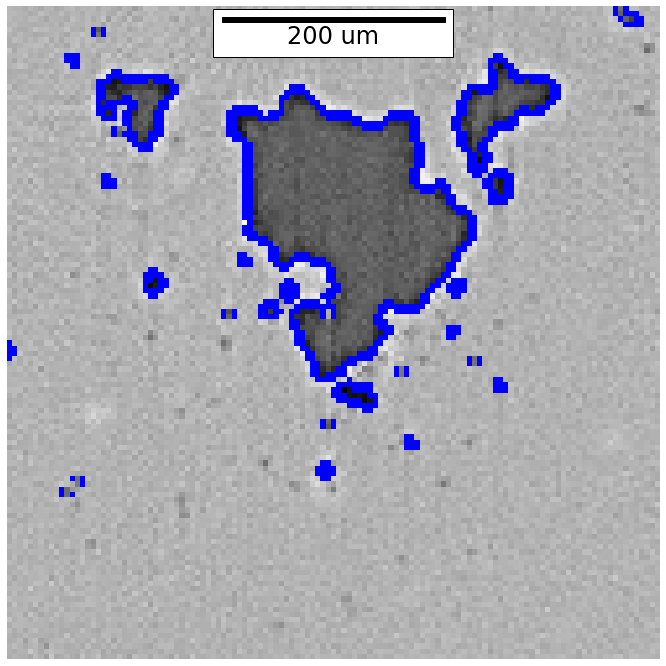

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[0][1000//b:1500//b,1000//b:1500//b], imp[0][1000//b:1500//b,1000//b:1500//b], ax, color =[0,0,255])
viewer.add_scalebar(ax, 200, 1.17*b, loc = 'upper center', fontsize = 24)
ax.axis('off')

<AxesSubplot:>

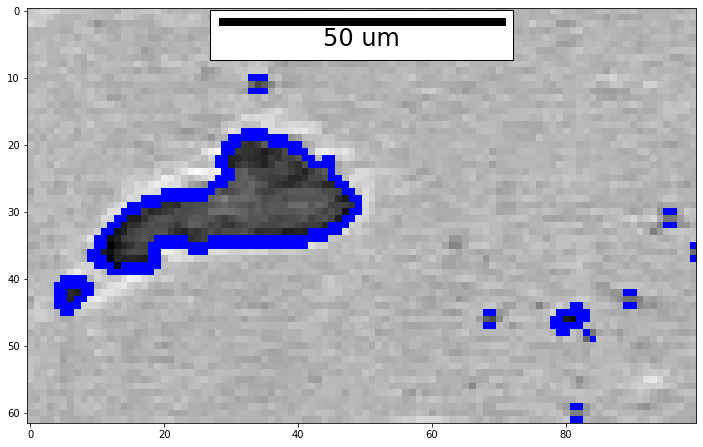

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(transform_ax2(imx[2][0:400//b,1000//b:1250//b]), transform_ax2(imp[2][0:400//b,1000//b:1250//b]), ax, color =[0,0,255])
viewer.add_scalebar(ax, 50, 1.17, loc = 'upper center', fontsize = 24)
# ax.axis('off')